# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Settings
units = 'metric'
url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&units={units}&q='

# For sets and breaks
count = 1
setNum = 1

# Storing data
name = []
cloud = []
country = []
date = []
humid = []
lat = []
lon = []
maxTemp = []
wind = []

# Starting iteration
print('''Beginning Data Retrieval
-----------------------------''')

for city in cities:
    data = requests.get(url + city).json()

    try:
        name.append(data['name'])
        cloud.append(data['clouds']['all'])
        country.append(data['sys']['country'])
        date.append(data['dt'])
        humid.append(data['main']['humidity'])
        lat.append(data['coord']['lat'])
        lon.append(data['coord']['lon'])
        maxTemp.append(data['main']['temp_max'])
        wind.append(data['wind']['speed'])
        print(f'Processing Record {count} of Set {setNum} | {city}')
        count = count + 1
            
    except:
        print('City not found. Skipping...')
    
    # Putting a break between each set to avoid overhaul
    if count == 51:
        count = 1
        setNum += 1
        print('------ break for 10 seconds ------')
        time.sleep(10)

print('''-----------------------------
Data Retrieval Complete
-----------------------------''')

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | punta arenas
Processing Record 2 of Set 1 | bluff
Processing Record 3 of Set 1 | mahebourg
City not found. Skipping...
Processing Record 4 of Set 1 | hermanus
Processing Record 5 of Set 1 | aranos
Processing Record 6 of Set 1 | cidreira
Processing Record 7 of Set 1 | netivot
Processing Record 8 of Set 1 | yellowknife
Processing Record 9 of Set 1 | hofn
Processing Record 10 of Set 1 | sorong
Processing Record 11 of Set 1 | mirabad
Processing Record 12 of Set 1 | high level
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | upernavik
Processing Record 15 of Set 1 | gizo
Processing Record 16 of Set 1 | cape town
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | serebryanyy bor
Processing Record 19 of Set 1 | takoradi
Processing Record 20 of Set 1 | souillac
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | torbay
Processing Record 23 of S

Processing Record 28 of Set 4 | mahibadhoo
Processing Record 29 of Set 4 | aksu
Processing Record 30 of Set 4 | honningsvag
Processing Record 31 of Set 4 | hervey bay
Processing Record 32 of Set 4 | anadyr
Processing Record 33 of Set 4 | bud
Processing Record 34 of Set 4 | kaili
City not found. Skipping...
Processing Record 35 of Set 4 | bandarbeyla
Processing Record 36 of Set 4 | lazaro cardenas
City not found. Skipping...
City not found. Skipping...
Processing Record 37 of Set 4 | nhulunbuy
City not found. Skipping...
Processing Record 38 of Set 4 | bambous virieux
Processing Record 39 of Set 4 | ancud
Processing Record 40 of Set 4 | vila franca do campo
Processing Record 41 of Set 4 | yar-sale
Processing Record 42 of Set 4 | tiksi
Processing Record 43 of Set 4 | tautira
Processing Record 44 of Set 4 | isangel
Processing Record 45 of Set 4 | qaqortoq
Processing Record 46 of Set 4 | tura
Processing Record 47 of Set 4 | ixtapa
Processing Record 48 of Set 4 | kahului
Processing Record 4

Processing Record 10 of Set 8 | lukuledi
Processing Record 11 of Set 8 | kalmunai
Processing Record 12 of Set 8 | vardo
Processing Record 13 of Set 8 | tsumeb
Processing Record 14 of Set 8 | khonsa
City not found. Skipping...
Processing Record 15 of Set 8 | miramar
City not found. Skipping...
Processing Record 16 of Set 8 | tevaitoa
Processing Record 17 of Set 8 | ilulissat
Processing Record 18 of Set 8 | sept-iles
Processing Record 19 of Set 8 | batagay
Processing Record 20 of Set 8 | padang
Processing Record 21 of Set 8 | talnakh
Processing Record 22 of Set 8 | kachiry
Processing Record 23 of Set 8 | coihaique
Processing Record 24 of Set 8 | belaya gora
Processing Record 25 of Set 8 | ajdabiya
Processing Record 26 of Set 8 | pringsewu
Processing Record 27 of Set 8 | lompoc
Processing Record 28 of Set 8 | riyadh
Processing Record 29 of Set 8 | aswan
Processing Record 30 of Set 8 | henties bay
Processing Record 31 of Set 8 | yugorsk
Processing Record 32 of Set 8 | mackenzie
Processing 

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
weather_df = pd.DataFrame({
    'City': name,
    'Cloudiness': cloud,
    'Country': country,
    'Date': date,
    'Humidity': humid,
    'Lat': lat,
    'Lng': lon,
    'Max Temp': maxTemp,
    'Wind Speed': wind
})
weather_df.to_csv(output_data_file)
weather_df.count()

City          521
Cloudiness    521
Country       521
Date          521
Humidity      521
Lat           521
Lng           521
Max Temp      521
Wind Speed    521
dtype: int64

In [5]:
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Punta Arenas,75,CL,1562532532,87,-53.16,-70.91,6.00,2.60
1,Bluff,100,AU,1562532385,80,-23.58,149.07,16.00,5.44
2,Mahebourg,75,MU,1562532532,83,-20.41,57.70,22.00,2.68
3,Hermanus,36,ZA,1562532532,79,-34.42,19.24,14.44,1.34
4,Aranos,0,NA,1562532532,19,-24.14,19.11,10.95,3.80


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

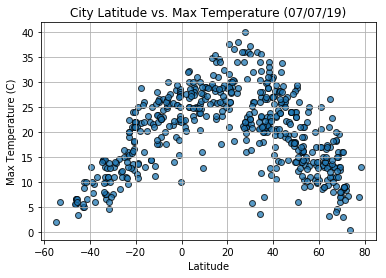

In [6]:
plt.scatter(weather_df['Lat'], weather_df['Max Temp'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Max Temperature (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (C)')
plt.grid()
plt.savefig('images/maxTemp.png')
plt.show()

#### Latitude vs. Humidity Plot

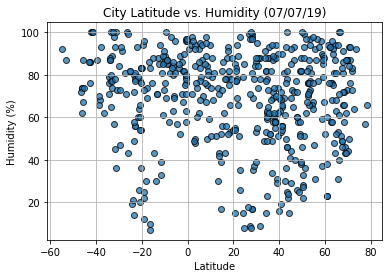

In [7]:
plt.scatter(weather_df['Lat'], weather_df['Humidity'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Humidity (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.savefig('images/humidity.png')
plt.show()

#### Latitude vs. Cloudiness Plot

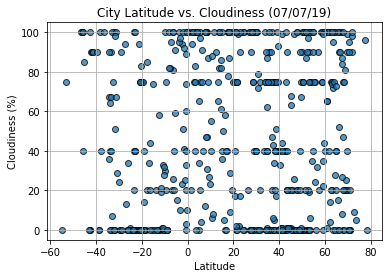

In [8]:
plt.scatter(weather_df['Lat'], weather_df['Cloudiness'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Cloudiness (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.savefig('images/cloudiness.png')
plt.show()

#### Latitude vs. Wind Speed Plot

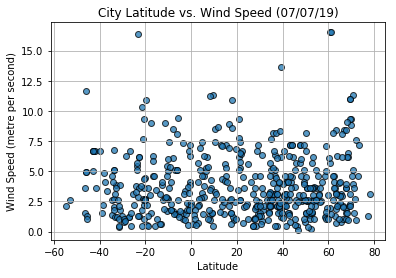

In [9]:
plt.scatter(weather_df['Lat'], weather_df['Wind Speed'], marker = 'o', alpha = 0.75, edgecolors = 'black')
plt.title('City Latitude vs. Wind Speed (07/07/19)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (metre per second)')
plt.grid()
plt.savefig('images/wind.png')
plt.show()